### Current forecasting error and aggregated forecast

In [85]:
import pandas as pd



df = pd.read_csv('mv_port_processed.csv')

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['Project Number'] = df['Project Number'].astype('str') 
df = df.loc[:, ~df.columns.str.contains('^index')]


df_sub = df[['Date','Project Number','Actual Net Revenue - MTD','Project Status', 'Contract Type Name', 'Ultimate Customer AUS Market Sector', 'Division Short Name', 'Proj_CVP', 'Proj_Serv_Offering',
             'primary_client_industry', 'Funding Amount - ITC (Snapshot)', 'Backlog NR',  'Actual Direct Labor Cost - MTD', 'Actual Non-Labor Cost - MTD',
       'Actual Gross Revenue - MTD', 'EBITA - MTD',
       'Forecast Direct Labor Cost - ITC', 'Forecast Net Revenue - ITC',
       'Order Intake (NR) - MTD', 'AUS Mkt Sector Aggregate', 'Baseline NR', 'Organization Size',
       'Risk Profile', 'riskrating_project', 'ActualNR_sum', 'Projectduration', 'Completion', 'scheduled_duration', 'Scheduled_projectduration', 'intime', 'seasonality_month']]

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,40,41,45,48,51,53,55,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_sub['Date'] = pd.to_datetime(df_sub['Date'], format='%Y%m') 

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

def decomposition_plot(df):
    df = df.set_index('Date')
    decomposition = sm.tsa.seasonal_decompose(df, model='additive')
    fig = decomposition.plot()
    return print(plt.show())

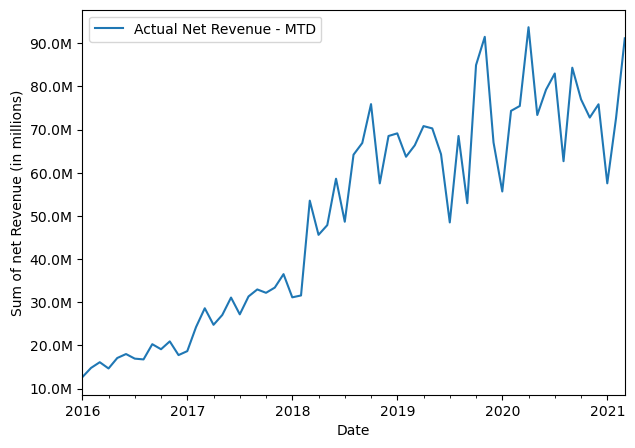

In [147]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


millions_formatter = FuncFormatter(millions)

sub=df_sub.groupby(['Date'])['Actual Net Revenue - MTD'].sum().reset_index()

sub.plot(x='Date', y='Actual Net Revenue - MTD', kind='line', figsize=(7,5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gca().set_ylabel('Sum of net Revenue (in millions)')
plt.show()

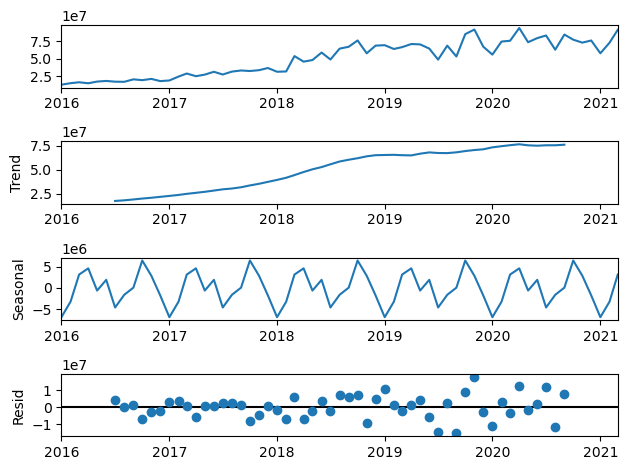

None


In [149]:
decomposition_plot(sub)

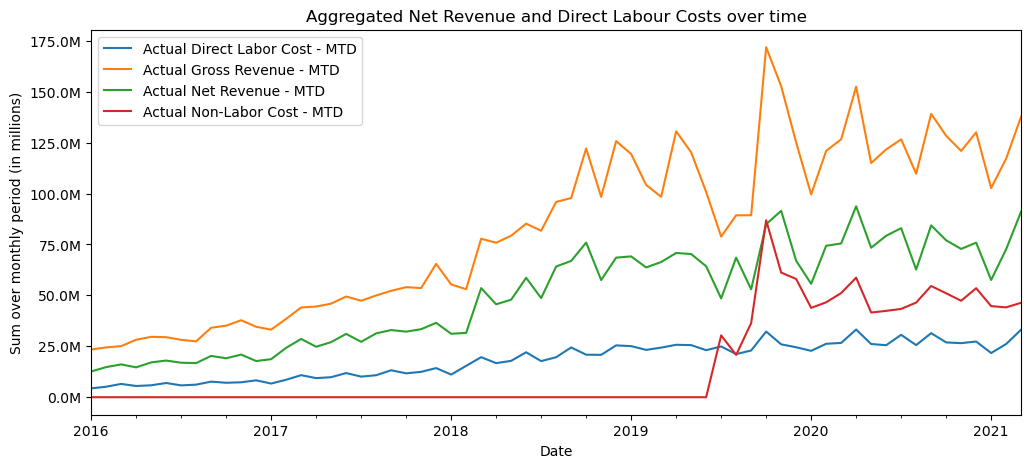

In [19]:
contracttypes = pd.pivot_table(df_sub,\
               values=['Actual Net Revenue - MTD', 'Actual Direct Labor Cost - MTD','Actual Non-Labor Cost - MTD', 'Actual Gross Revenue - MTD'], index='Date', aggfunc='sum').fillna(0)

contracttypes.plot(figsize=(12,5));
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xlabel('Date')
plt.ylabel('Sum over monthly period (in millions)')
plt.title('Aggregated Net Revenue and Direct Labour Costs over time');
plt.show()

In [4]:
df_sub['Actual Net Revenue - MTD'].describe()

count    1.269171e+06
mean     2.482369e+03
std      3.037958e+05
min     -5.056956e+07
25%      0.000000e+00
50%      0.000000e+00
75%      2.212300e+02
max      5.056956e+07
Name: Actual Net Revenue - MTD, dtype: float64

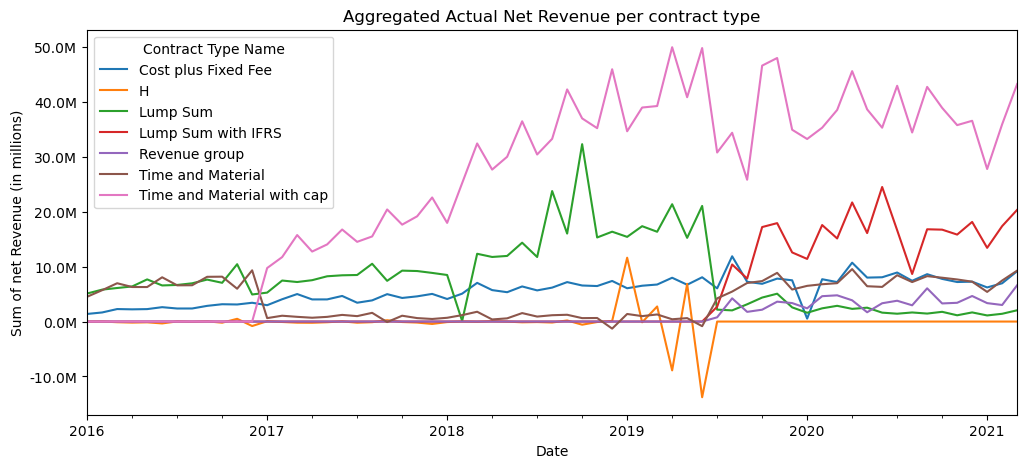

In [23]:
df_sub = df_sub[df_sub['Contract Type Name'] != 'R']
df_sub = df_sub[df_sub['Contract Type Name'] != 'N']
df_sub = df_sub[df_sub['Contract Type Name'] != 'D']
df_sub = df_sub[df_sub['Contract Type Name'] != 'Unspecified']


contracttypes = pd.pivot_table(df_sub,\
               values='Actual Net Revenue - MTD', index='Date', \
              columns='Contract Type Name', aggfunc='sum').fillna(0)

contracttypes.plot(figsize=(12,5));
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xlabel('Date')
plt.ylabel('Sum of net Revenue (in millions)')
plt.title('Aggregated Actual Net Revenue per contract type');
plt.show()

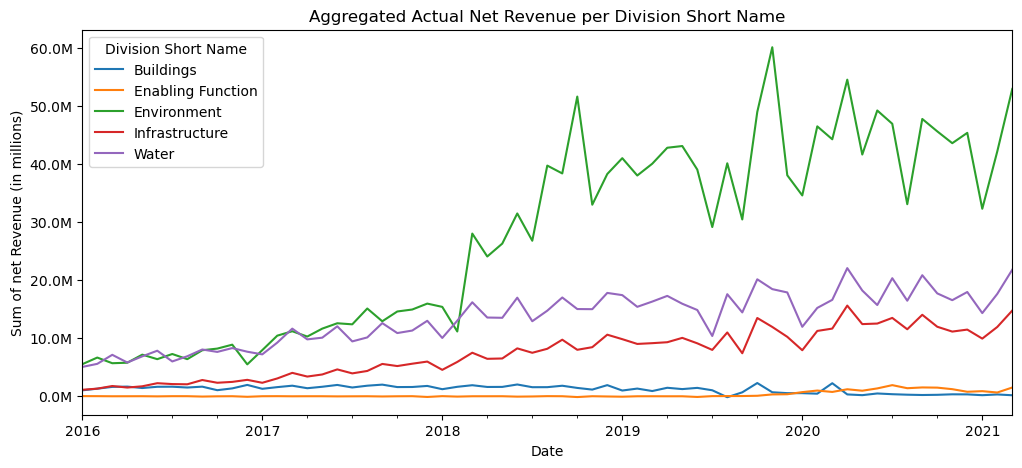

In [21]:
div = pd.pivot_table(df_sub,\
               values='Actual Net Revenue - MTD', index='Date', \
              columns='Division Short Name', aggfunc='sum').fillna(0)

div.plot(figsize=(12,5));
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xlabel('Date')
plt.ylabel('Sum of net Revenue (in millions)')
plt.title('Aggregated Actual Net Revenue per Division Short Name');
plt.show()

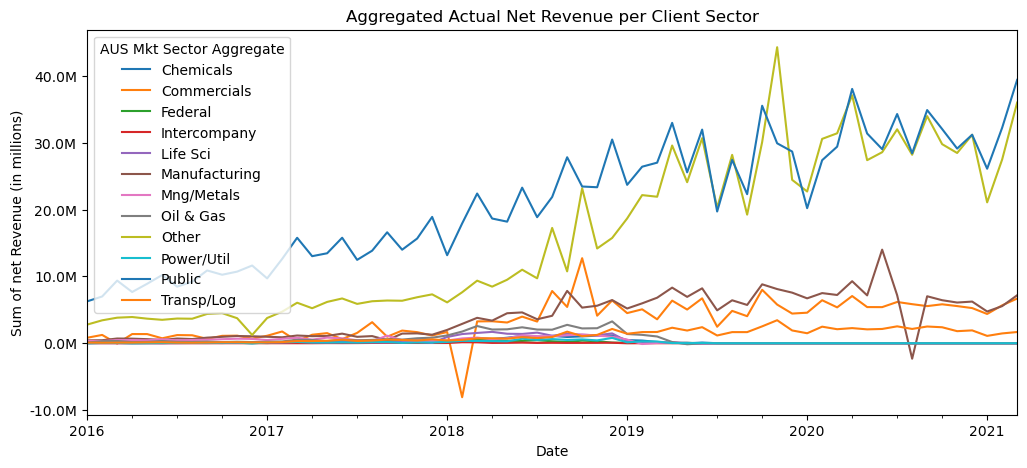

In [20]:
div = pd.pivot_table(df_sub,\
               values='Actual Net Revenue - MTD', index='Date', \
              columns='AUS Mkt Sector Aggregate', aggfunc='sum').fillna(0)

div.plot(figsize=(12,5));
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xlabel('Date')
plt.ylabel('Sum of net Revenue (in millions)')
plt.title('Aggregated Actual Net Revenue per Client Sector');
plt.show()


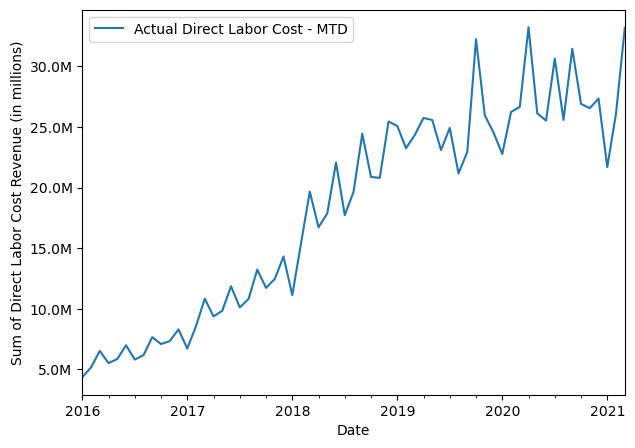

In [164]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


millions_formatter = FuncFormatter(millions)

sub=df_sub.groupby(['Date'])['Actual Direct Labor Cost - MTD'].sum().reset_index()

sub.plot(x='Date', y='Actual Direct Labor Cost - MTD', kind='line', figsize=(7,5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gca().set_ylabel('Sum of Direct Labor Cost Revenue (in millions)')
plt.show()

In [ ]:
primary_client_industry

## We can also difference the time serie

### Augmented Dickey-Fuller test (ADF)
ADF tests the null hypothesis that a unit root is present in time series sample. ADF statistic is a negative number and more negative it is the stronger the rejection of the hypothesis that there is a unit root.
- Null Hypotehsis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary.
- p-value > 0.05: Accept H0, the data has a unit root and is non-stationary
- p-value ≤ 0.05: Reject H0. the data does not have a unit root and is stationary

In [151]:
from statsmodels.tsa.stattools import adfuller

sub=df_sub.groupby(['Date'])['Actual Net Revenue - MTD'].sum().reset_index()

X = sub['Actual Net Revenue - MTD'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.048906
p-value: 0.735012
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594


### Clearly the series is non stationary, so we can try a common trick which is differencing

In [25]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

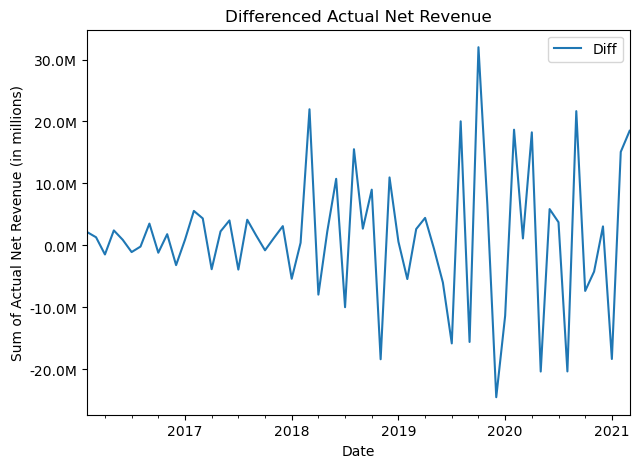

In [138]:
X = sub['Actual Net Revenue - MTD'].values
diff = difference(X)
subsub = df.sort_values(by="Date")
dates = subsub['Date'].unique()
dates = dates[1:]
entry = list(zip(diff, dates))

subdf = pd.DataFrame(entry, columns=['Diff', 'Date'])
subdf['Date'] = pd.to_datetime(subdf['Date'], format='%Y%m') 


subdf.plot(x='Date', y='Diff', kind='line', figsize=(7,5))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gca().set_ylabel('Sum of Actual Net Revenue (in millions)')
plt.title('Differenced Actual Net Revenue')
plt.show()

In [54]:
''' The differenced time series seems to follow the ADF test'''
## Let's try the test again
X = diff
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.069342
p-value: 0.000000
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594


### Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.

In [173]:
from statsmodels.tsa.stattools import kpss


def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [175]:
kpss_test(diff)

KPSS Statistic: 0.0973783584428955
p-value: 0.1
num lags: 11
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/Users/julia/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Users/julia/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


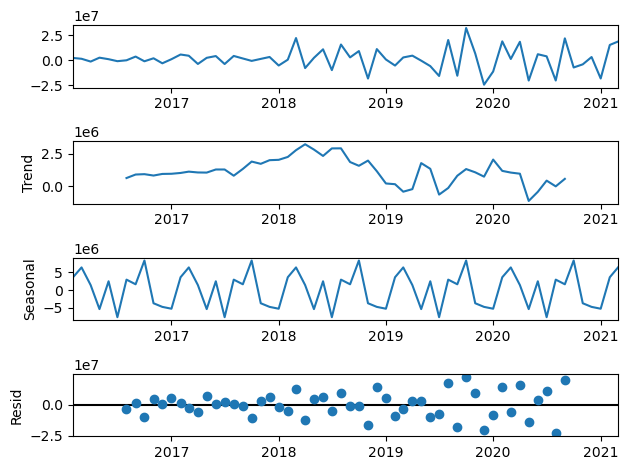

None


In [146]:
decomposition_plot(subdf)

### Now let's check Box Cox transformation

The Box-Cox transform is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your time series. The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, depending on the underlying process that generated it.

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

Lambda: 0.652347


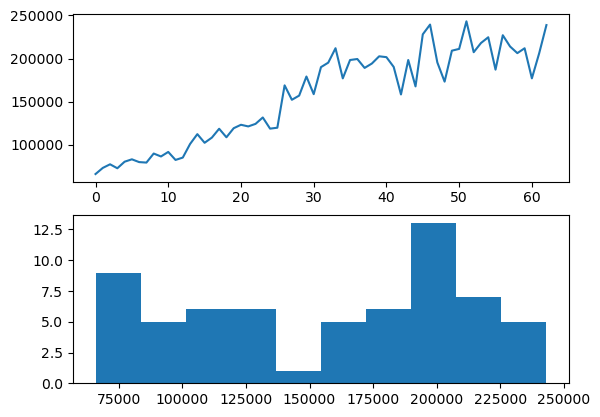

In [186]:
from scipy.stats import boxcox
from matplotlib import pyplot


sub=df_sub.groupby(['Date'])['Actual Net Revenue - MTD'].sum().reset_index()

sub['Actual Net Revenue - MTD'], lam = boxcox(sub['Actual Net Revenue - MTD'])

#sub['Actual Net Revenue - MTD'] = boxcox(sub['Actual Net Revenue - MTD'], lmbda=-1)
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(sub['Actual Net Revenue - MTD'])
# histogram
pyplot.subplot(212)
pyplot.hist(sub['Actual Net Revenue - MTD'])
pyplot.show()

### Let's check the mean forecasting error for 2020

In [106]:
errordf =df_sub[df_sub['Date'] > '2019-12']

In [73]:
''' These are the values we are working with, so we have to make sure they are not missing'''

errordf = errordf[errordf['Funding Amount - ITC (Snapshot)'].notna()]
errordf = errordf[errordf['Scheduled_projectduration'].notna()]
errordf = errordf[errordf['Forecast Net Revenue - ITC'].notna()]

In [111]:
errordf['Artifical Forecast'] = errordf['Funding Amount - ITC (Snapshot)'].divide( errordf['Scheduled_projectduration']) 

In [112]:
import numpy as np
from numpy import inf


errordf = errordf[errordf['Artifical Forecast'].notna()]
errordf = errordf[errordf['Actual Net Revenue - MTD'].notna()]
errordf[errordf['Artifical Forecast']== -inf] = 0

errordf[errordf['Artifical Forecast']== inf] = 0

In [ ]:
errordf['Artifical Forecast'] = errordf['Funding Amount - ITC (Snapshot)'].divide( errordf['Scheduled_projectduration']) 

In [113]:
''' Lets compute the current forecasting error'''

mse = ((errordf['Forecast Net Revenue - ITC'].values - errordf['Actual Net Revenue - MTD'].values) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 365013366701.59


In [114]:
''' Lets compute the current forecasting error'''

mse = ((errordf['Artifical Forecast'].values - errordf['Actual Net Revenue - MTD'].values) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 4878287784.81


In [115]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 69844.74


In [116]:
errordf['Actual Net Revenue - MTD'].describe()

count    6.680090e+05
mean     1.682273e+03
std      2.333282e+04
min     -6.284046e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.126423e+06
Name: Actual Net Revenue - MTD, dtype: float64

In [133]:
''' For the plotting in the next step, we have to make sure that the dateime is in the correct format'''

from datetime import datetime

errordf = errordf[errordf['Date'].notna()]
errordf['Date'] = pd.to_datetime(errordf['Date'], format="%Y-%m-%d")
errordf = errordf[errordf['Date'].apply(type) != int]
errordf.Date.apply(lambda x: x.strftime('%Y-%m-%d'))


19885      2020-01-01
19886      2020-02-01
19887      2020-03-01
19888      2020-04-01
19889      2020-05-01
              ...    
1029051    2021-03-01
1029052    2021-03-01
1029053    2021-03-01
1029054    2021-03-01
1029055    2021-03-01
Name: Date, Length: 667720, dtype: object

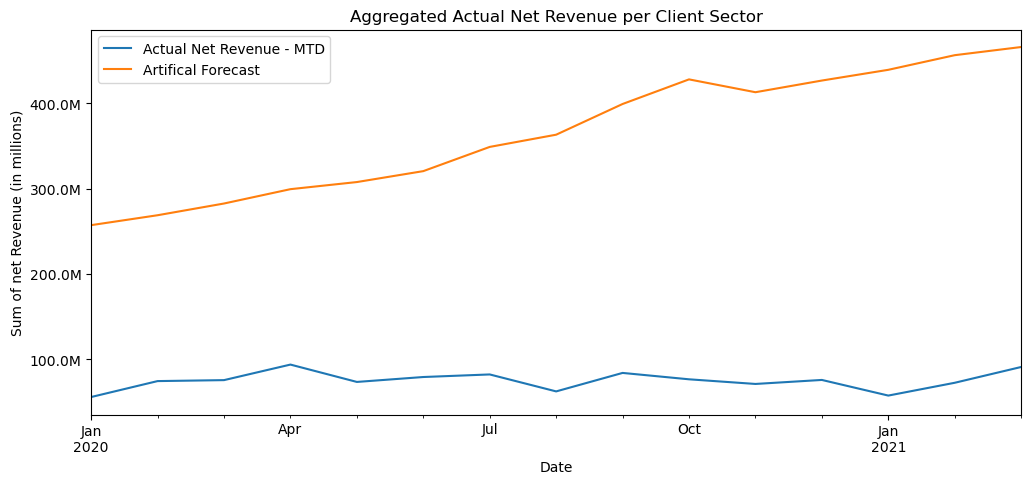

In [189]:
''' Lets also plot the error'''

 

div = pd.pivot_table(errordf, values=['Actual Net Revenue - MTD', 'Artifical Forecast'], index='Date', aggfunc='sum').fillna(0)

div.plot(figsize=(12,5));
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xlabel('Date')
plt.ylabel('Sum of net Revenue (in millions)')
plt.title('Aggregated Actual Net Revenue per Client Sector');
plt.show()

### Now let's try classic forecasting techniques for

In [ ]:
### square root transformation 

sqrt(dataframe['passengers'])

In [191]:
sub=df_sub.groupby(['Date'])['Actual Net Revenue - MTD'].sum().reset_index()

In [192]:
sub

,Date,Actual Net Revenue - MTD
0,2016-01-01,12633592.85
1,2016-02-01,14788553.17
2,2016-03-01,16113140.07
3,2016-04-01,14661389.44
4,2016-05-01,17089745.67
...,...,...
58,2020-11-01,72803169.39
59,2020-12-01,75877551.10
60,2021-01-01,57561587.89
61,2021-02-01,72661198.77
